# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | pilar
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | twon-brass
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | sai kung
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | astrakhan
Processing Record 15 of Set 1 | soio
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | rosso
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | karratha
Processing Record 22 of Set 1 | grand gaube
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,15.57,71,100,2.68,NZ,1738809341
1,adamstown,-25.0660,-130.1015,25.27,78,17,5.15,PN,1738809342
2,pilar,-9.5972,-35.9567,23.96,91,100,0.75,BR,1738809343
3,isafjordur,66.0755,-23.1240,0.88,83,100,19.84,IS,1738809211
4,vorgashor,67.5833,63.9500,-14.42,98,100,3.83,RU,1738809346


In [8]:
# Export the City_Data into a csv
import os
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,15.57,71,100,2.68,NZ,1738809341
1,adamstown,-25.0660,-130.1015,25.27,78,17,5.15,PN,1738809342
2,pilar,-9.5972,-35.9567,23.96,91,100,0.75,BR,1738809343
3,isafjordur,66.0755,-23.1240,0.88,83,100,19.84,IS,1738809211
4,vorgashor,67.5833,63.9500,-14.42,98,100,3.83,RU,1738809346


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

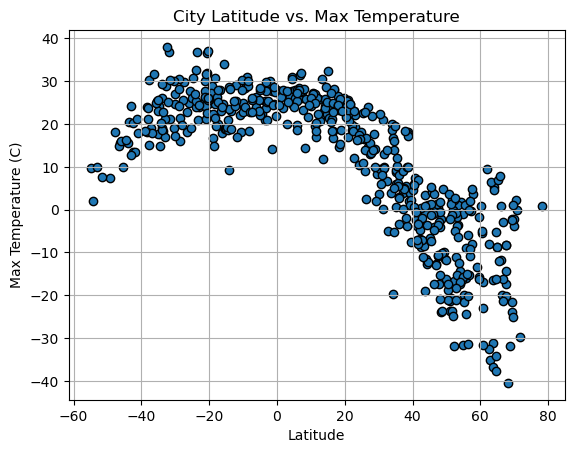

In [73]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

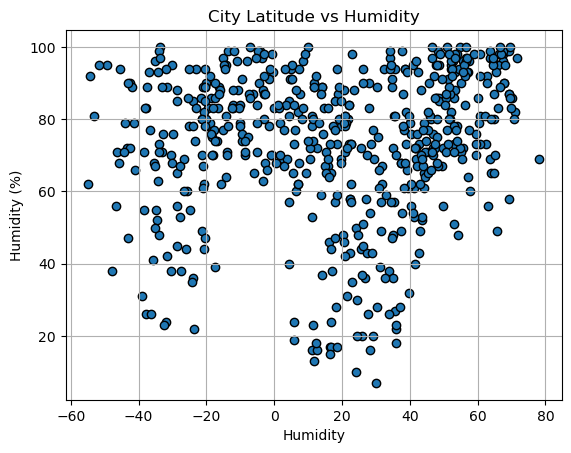

In [74]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Humidity")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

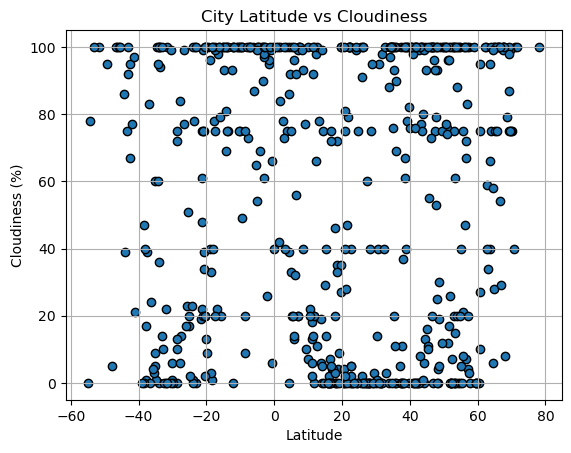

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

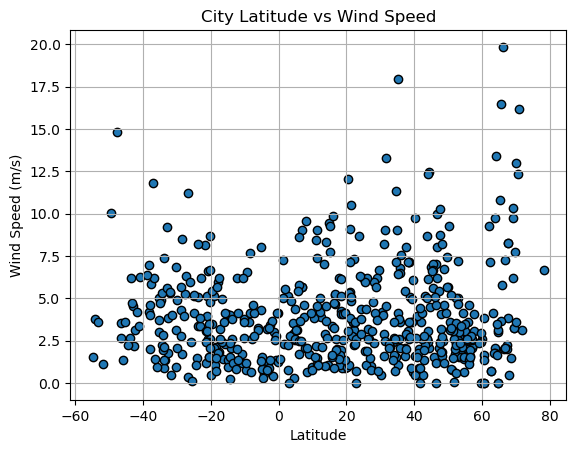

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [162]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
    #Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
    regress_values = slope * x_values + intercept
    r_squared = r_value**2

    #Print r^2
    print(f"{title}\nR^2 = {r_squared:.2f}\n")

    #Scatter Plot
    plt.scatter(x_values,y_values,edgecolors="black")

    #Regression Line
    plt.plot(x_values, regress_values, "r")

    #Labels and Title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    #Annotate regression equation on the plot
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text,
                 xy=(min(x_values) + 5, min(y_values) + 5),
                 fontsize=12, color="red")

    #Legend and grid
    plt.grid(True)

    #Show Plot
    plt.show()



In [163]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,isafjordur,66.0755,-23.1240,0.88,83,100,19.84,IS,1738809211
4,vorgashor,67.5833,63.9500,-14.42,98,100,3.83,RU,1738809346
5,tazovsky,67.4667,78.7000,-17.35,96,100,2.24,RU,1738809347
7,twon-brass,4.3151,6.2418,27.58,81,100,3.53,NG,1738809349
9,korla,41.7597,86.1469,-6.98,69,100,0.63,CN,1738809351


In [164]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,15.57,71,100,2.68,NZ,1738809341
1,adamstown,-25.0660,-130.1015,25.27,78,17,5.15,PN,1738809342
2,pilar,-9.5972,-35.9567,23.96,91,100,0.75,BR,1738809343
6,cidreira,-30.1811,-50.2056,24.55,95,6,3.15,BR,1738809348
8,port alfred,-33.5906,26.8910,18.43,100,100,1.34,ZA,1738809350


###  Temperature vs. Latitude Linear Regression Plot

Latitude vs. Max Temp
R^2 = 0.73



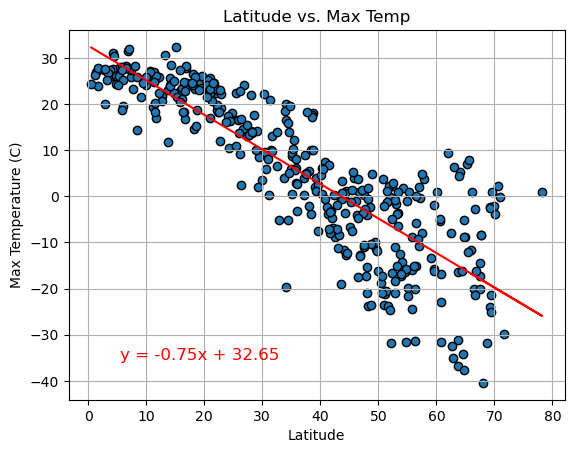

In [165]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (C)",
                       "Latitude vs. Max Temp")

Latitude vs. Max Temp
R^2 = 0.18



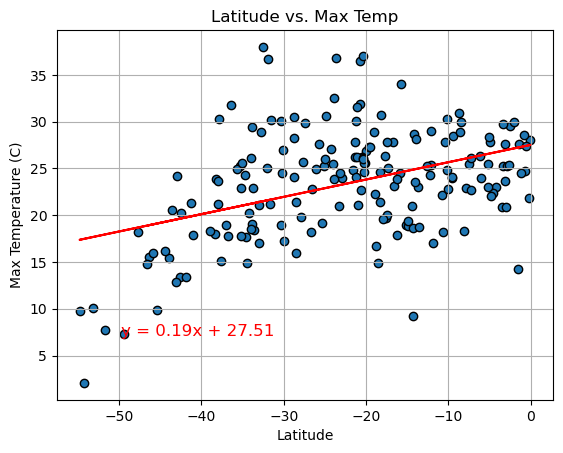

In [174]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (C)",
                       "Latitude vs. Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [251]:
print("Northern Hempisphere Discussion:\n"
      "The Northern Hemisphere shows a strong negative linear relationship between latitude and max temperature.\n"
      "The r^2 value of 0.73 tells us that 73% of the variation in temperature can be explained by latitude.\n"
      "This shows us that as latitude increases, temperature decreases notably.\n"
      "\n"
      "Southern Hemisphere Discussion:\n"
      "The Southern Hemisphere shows a weak relationship between latitude and max temperature.\n"
      "However, we do see that temperatures increase as we get closer to the equator (0 Latitude).")

Northern Hempisphere Discussion:
The Northern Hemisphere shows a strong negative linear relationship between latitude and max temperature.
The r^2 value of 0.73 tells us that 73% of the variation in temperature can be explained by latitude.
This shows us that as latitude increases, temperature decreases notably.

Southern Hemisphere Discussion:
The Southern Hemisphere shows a weak relationship between latitude and max temperature.
However, we do see that temperatures increase as we get closer to the equator (0 Latitude).


### Humidity vs. Latitude Linear Regression Plot

Latitude vs. Humidity
R^2 = 0.11



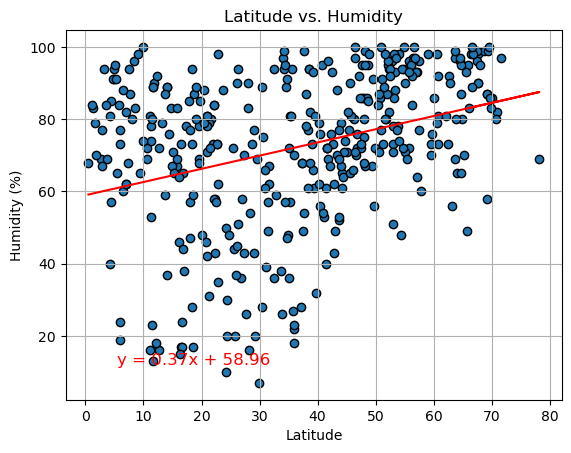

In [252]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],
                       "Latitude", "Humidity (%)",
                       "Latitude vs. Humidity")

Latitude vs. Humidity
R^2 = 0.08



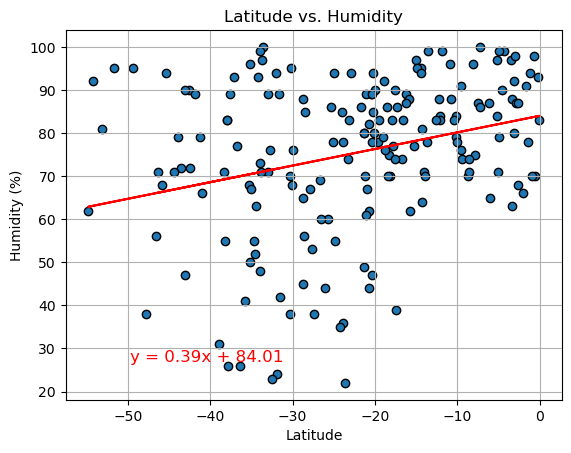

In [253]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],
                       "Latitude", "Humidity (%)",
                       "Latitude vs. Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [258]:
print("Northern Hempisphere Discussion:\n"
      "The Northern Hemisphere scatter plot shows no strong linear relationship between latitude and humidity.\n"
      "This indicates that humidity is not likely influenced by latitude.\n"
      "\n"
      "Southern Hemisphere Discussion:\n"
      "The Southern Hemisphere like the Northern Hemisphere also shows a weak relationship between latitude and humidity.\n"
      "This indicates that humidity is more likely caused by other factors other than latitude")

Northern Hempisphere Discussion:
The Northern Hemisphere scatter plot shows no strong linear relationship between latitude and humidity.
This indicates that humidity is not likely influenced by latitude.

Southern Hemisphere Discussion:
The Southern Hemisphere like the Northern Hemisphere also shows a weak relationship between latitude and humidity.
This indicates that humidity is more likely caused by other factors other than latitude


### Cloudiness vs. Latitude Linear Regression Plot

Latitude vs. Cloudiness
R^2 = 0.03



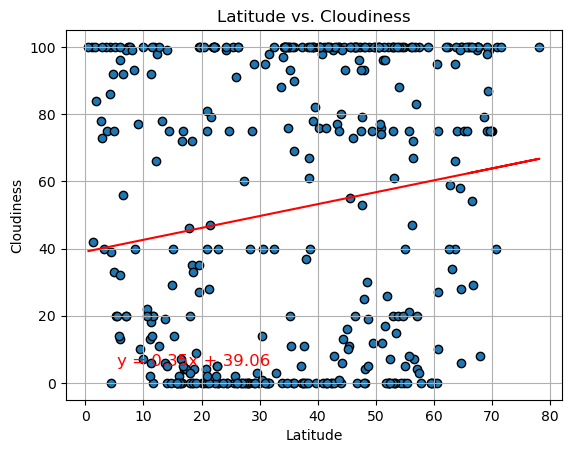

In [259]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness",
                       "Latitude vs. Cloudiness")

Latitude vs. Cloudiness
R^2 = 0.07



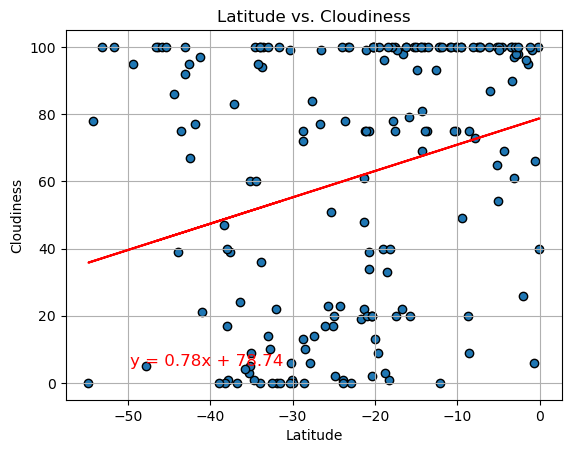

In [260]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness",
                       "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [263]:
print("Both hemispheres show notably weak relationships between latitude and cloudiness.")

Both hemispheres show notably weak relationships between latitude and cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

Latitude vs. Wind Speed
R^2 = 0.00



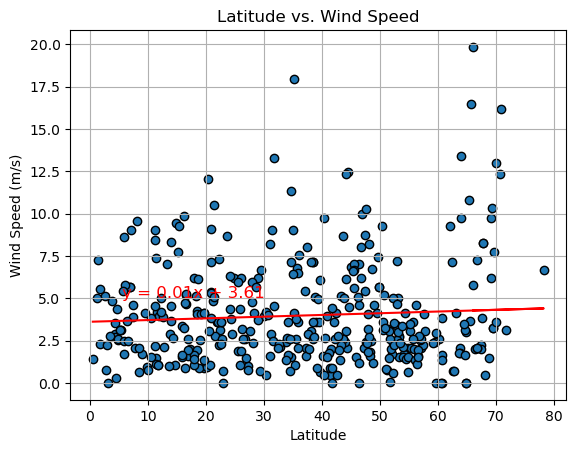

In [264]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)",
                       "Latitude vs. Wind Speed")

Latitude vs. Wind Speed
R^2 = 0.07



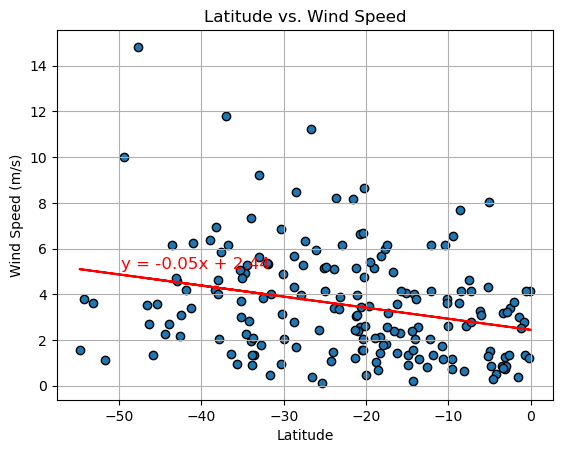

In [265]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)",
                       "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [266]:
print("Both hemispheres display a weak correlation between latitude and wind speed. This tells us wind speed is most likely not affected by latitude.")

Both hemispheres display a weak correlation between latitude and wind speed. This tells us wind speed is most likely not affected by latitude
